# GDP Analysis of States in India 

In [1030]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import glob #import all the library
import os
df=pd.read_csv('GDP_.csv',index_col=1)#Download File
import warnings
warnings.filterwarnings("ignore")
                    

In [1031]:
#Create a dataframe for % growth 
#I used years 2012 thru 2016 as 2016-2017 has too much missing data
df=df.iloc[6:-1]
df.head()

,Items Description,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
Duration,,,,,,,,,,,,,,,,,,,,,
2012-13,(% Growth over previous year),8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
2013-14,(% Growth over previous year),12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
2014-15,(% Growth over previous year),13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
2015-16,(% Growth over previous year),15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [1032]:
#Made a list and eliminating Union territories
ut_list = ['Chandigarh', 'Delhi','Puducherry','Andaman & Nicobar Islands']
df = df.drop(ut_list, axis = 1)
#Drop Null
df = df.drop(df.columns[df.isnull().all()], axis = 1)
df=df.reset_index()
df=df.reset_index()
df.columns = [c.replace(' ', '_') for c in df.columns] 
Df=df.drop("Items__Description",axis=1)
df.head()

,index,Duration,Items__Description,Andhra_Pradesh_,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttar_Pradesh,Uttarakhand,All_India_GDP
0,0,2012-13,(% Growth over previous year),8.43,13.41,9.56,14.25,12.30,-10.02,17.69,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
1,1,2013-14,(% Growth over previous year),12.85,16.38,13.31,12.30,16.44,-5.77,11.47,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
2,2,2014-15,(% Growth over previous year),13.40,14.79,11.45,17.92,13.69,13.12,10.82,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
3,3,2015-16,(% Growth over previous year),15.85,12.07,13.19,10.59,10.98,10.75,11.09,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


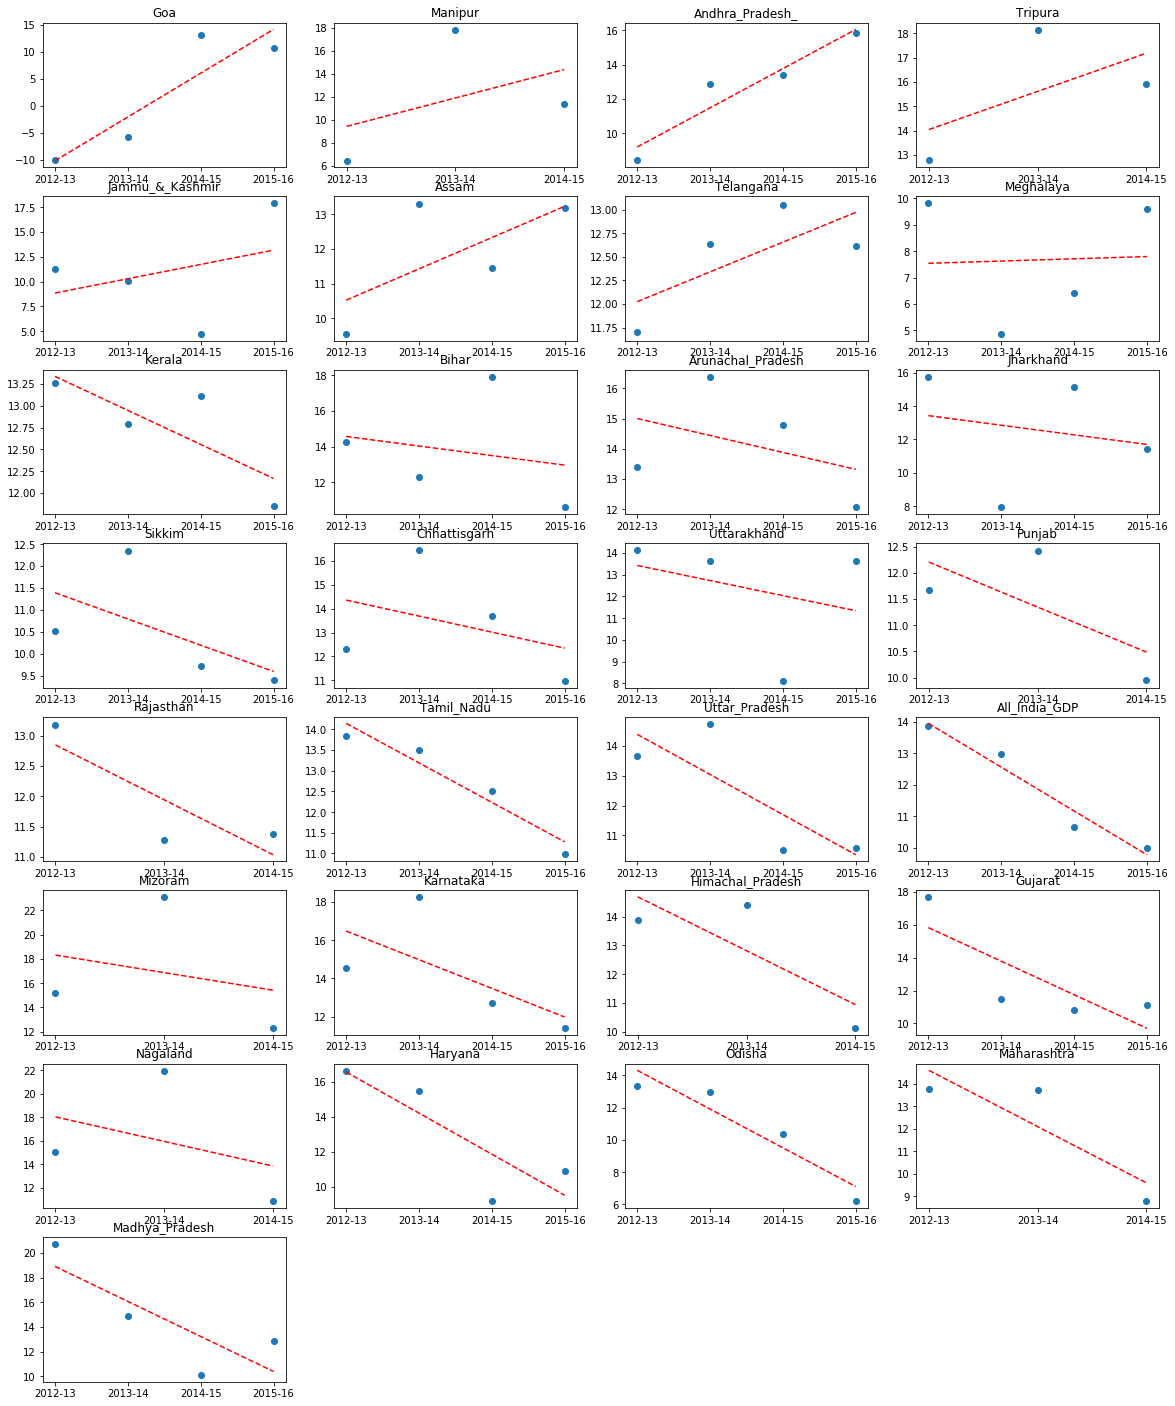

In [1033]:
#bestfit lines to determine the growth rate
list_slope = []  
for i in df.columns[3:]: 
    a = np.arange(len(df[i].dropna()))
    m, c = np.polyfit(a, df[i].dropna(), 1) 
    list_slope.append([m, i]) 
    #create the df using the same list
slope_state = pd.DataFrame(list_slope, columns = ['Slope', 'State'])
#sorting by Slope descending
slope_state =  slope_state.sort_values(by = 'Slope', ascending = False)
plt.figure(figsize=(20,25))
counter = 1
for i in slope_state['State']:
    plt.subplot(8,4,counter)
    plt.scatter(x = df.Duration, y = df[i])
    plt.title(i)
    a = np.arange(len(df[i].dropna()))
    m, c = np.polyfit(a, df[i].dropna(), 1)
    plt.plot(a, m*a+c, '--r')
        
    counter += 1


In [1034]:
print( "Rate of growth for each state over 2012 thru 2016 is:")
slope_state.reset_index() 
slope_state.head()

Rate of growth for each state over 2012 thru 2016 is:


,Slope,State
5,8.120,Goa
15,2.470,Manipur
0,2.281,Andhra_Pradesh_
25,1.570,Tripura
9,1.441,Jammu_&_Kashmir


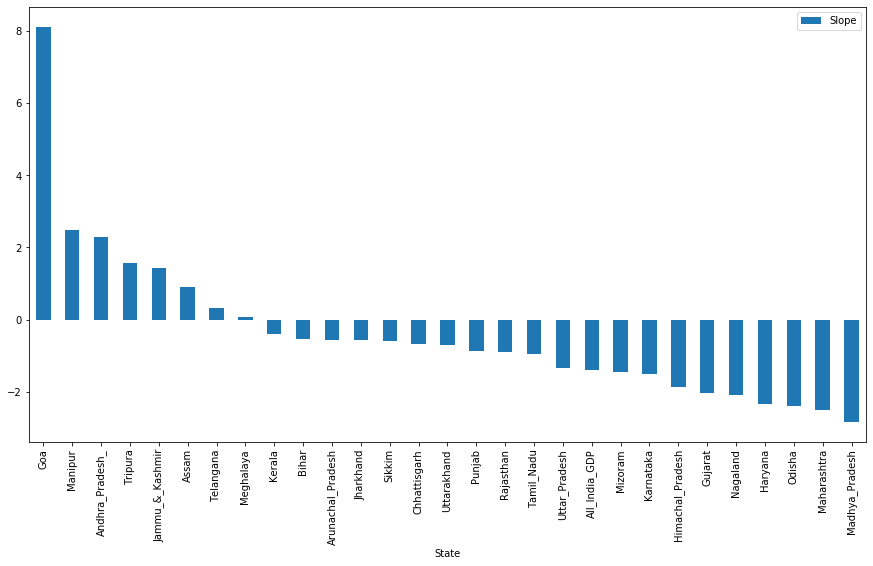

In [1035]:
#Bar plot for the Growth Rate
slope_state.plot.bar(x='State', y='Slope', figsize =(15,8)) 
plt.show()


# GSDP for 2014-15

In [1036]:
#Dataframe for GDP for the year 2014-2015 by state
df=pd.read_csv('GDP_.csv',index_col=1)
ut_list = ['Chandigarh', 'Delhi','Puducherry','Andaman & Nicobar Islands']
df = df.drop(ut_list, axis = 1)
df = df.drop(df.columns[df.isnull().all()], axis = 1)
df = df[(df.index == '2015-16') & (df['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)')]
df = df.drop('Items  Description', axis = 1)
df= df.drop('All_India GDP', axis = 1)
df = df.T
df.head()

Duration,2015-16
Andhra Pradesh,609934.0
Arunachal Pradesh,18784.0
Assam,224234.0
Bihar,413503.0
Chhattisgarh,260776.0


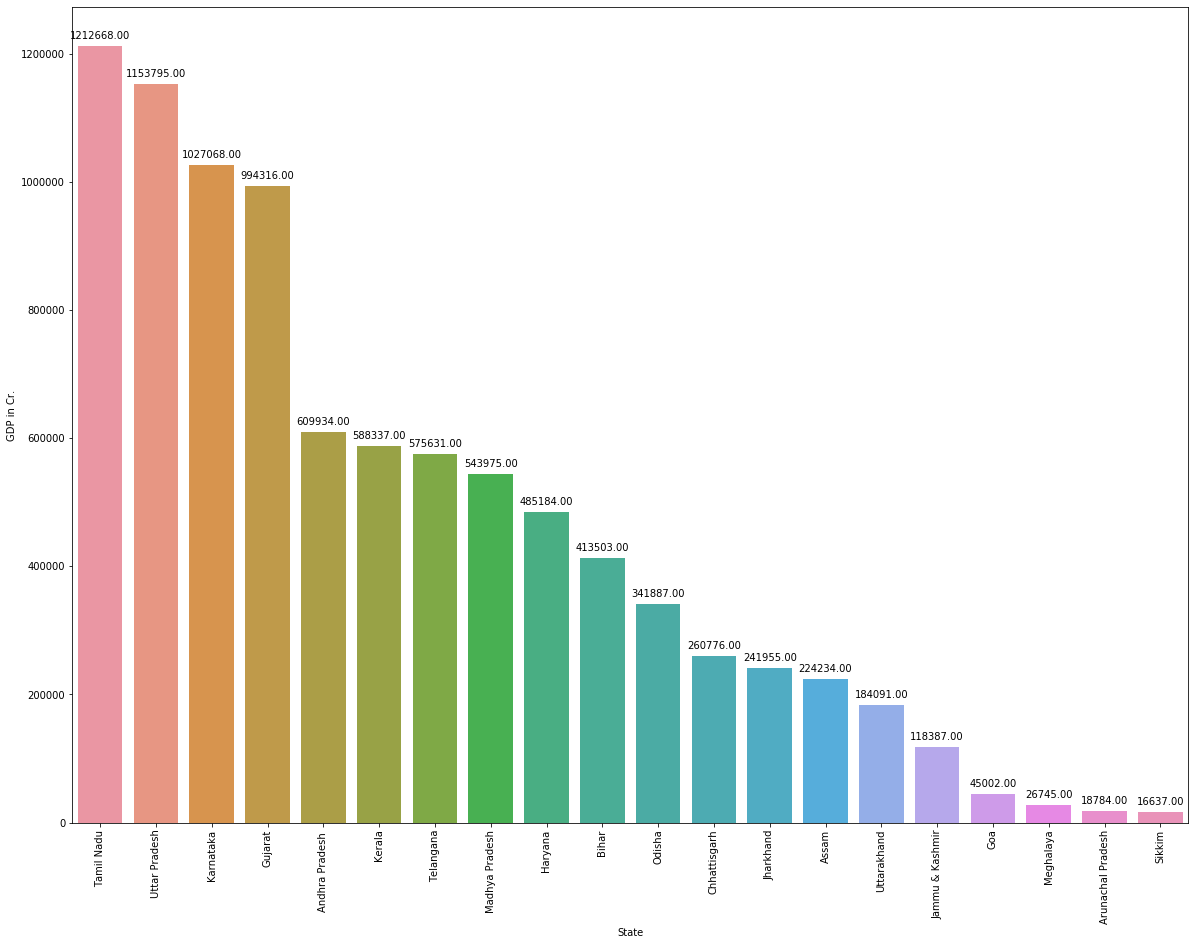

In [1037]:
#Visual representation for the GSDP
df = df.sort_values(by = '2015-16', ascending = False)
df = df.reset_index()
plt.figure(figsize=(20,15))
graph=sns.barplot(x= 'index', y = '2015-16', data=df.dropna())
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.xticks(rotation = 90)
plt.xlabel('State')
plt.ylabel('GDP in Cr.')
plt.show()


# IB Analysis of Sector and sub-sector contribution to GSDP

In [980]:
#Merging the data from all the states and union-territories
path = os.path.expanduser('~/Downloads/GDP Project/Data1')#download the files in the folder from the computer 
allfiles=glob.glob(path+'/*.csv')#read the file
all_states= pd.DataFrame()#create a dataframe
#for loop to select the columns needed/ transpose it/make the columns redable
for f in allfiles:
    df = pd.read_csv(f, encoding = 'ISO-8859-1')
    df = df[['Item', '2014-15']]
    df = df.T
    df.columns = df.iloc[0]
    df = df[1:]
    #df['State']=f.split('/')[-1].split('.')[0].replace('-GSVA_cur_2015-16','').replace('-GSVA_cur_2016-17','').replace('-GSVA_cur_2014-15','')
    df['State'] = f.split('/')[-1].split('-')[0]  #.replace('_', ' ')
    all_states=all_states.append(df,sort=False)
#make state the index
all_states.set_index('State', inplace=True)
#Drop null
all_states = all_states.drop(df.columns[df.isnull().all()], axis = 1)

In [981]:
all_states=all_states.reset_index()
all_states.head()

,State,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",...,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Services incidental to transport*,TOTAL NSVA at basic prices,Net State Domestic Product,Per Capita NSDP (Rs.),Road transport*,Trade & repair services*,Road transport**
0,Uttar_Pradesh,25097754,16215212,7096876,1404936,380730,901501,25999255,12261649,2030625,...,104337115,2109940,49450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Meghalaya,366521,223330,72442,61166,9583,84529,451050,433213,54473,...,2.44081e+06,32020,76228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andhra_Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,...,52646842,501510,104977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,...,23498180,270530,86860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sikkim,137447,114976,17338,4529,604,1329,138776,550697,212499,...,1520933,6330,240274,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [982]:
all_states.columns

Index(['State', 'Agriculture, forestry and fishing', 'Crops', 'Livestock',
       'Forestry and logging', 'Fishing and aquaculture',
       'Mining and quarrying', 'Primary', 'Manufacturing',
       'Electricity, gas, water supply & other utility services',
       'Construction', 'Secondary', 'Trade, repair, hotels and restaurants',
       'Trade & repair services',
       'Transport, storage, communication & services related to broadcasting',
       'Railways', 'Services incidental to transport', 'Storage',
       'Communication & services related to broadcasting',
       'Financial services',
       'Real estate, ownership of dwelling & professional services',
       'Public administration', 'Other services', 'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       'Population ('00)', 'Per Capita GSDP (Rs.)',
       'Services incidental to transport*', 'TOTAL NSVA at basic prices',
       'Net State D

Question:
Plot the GDP per capita for all the states.
I chose to use use bar plot for the visualization for the ease of comparing the position of the sates.


In [983]:
#Create a dataframe State vs per Capita
percapita= all_states.filter(['State','Per Capita GSDP (Rs.)'], axis=1)
percapita.sort_values(by='Per Capita GSDP (Rs.)',ascending = False,inplace=True)
percapita.head()

,State,Per Capita GSDP (Rs.)
6,Delhi,274041
13,Goa,271793
4,Sikkim,240274
7,Puducherry,175701
25,Haryana,164077


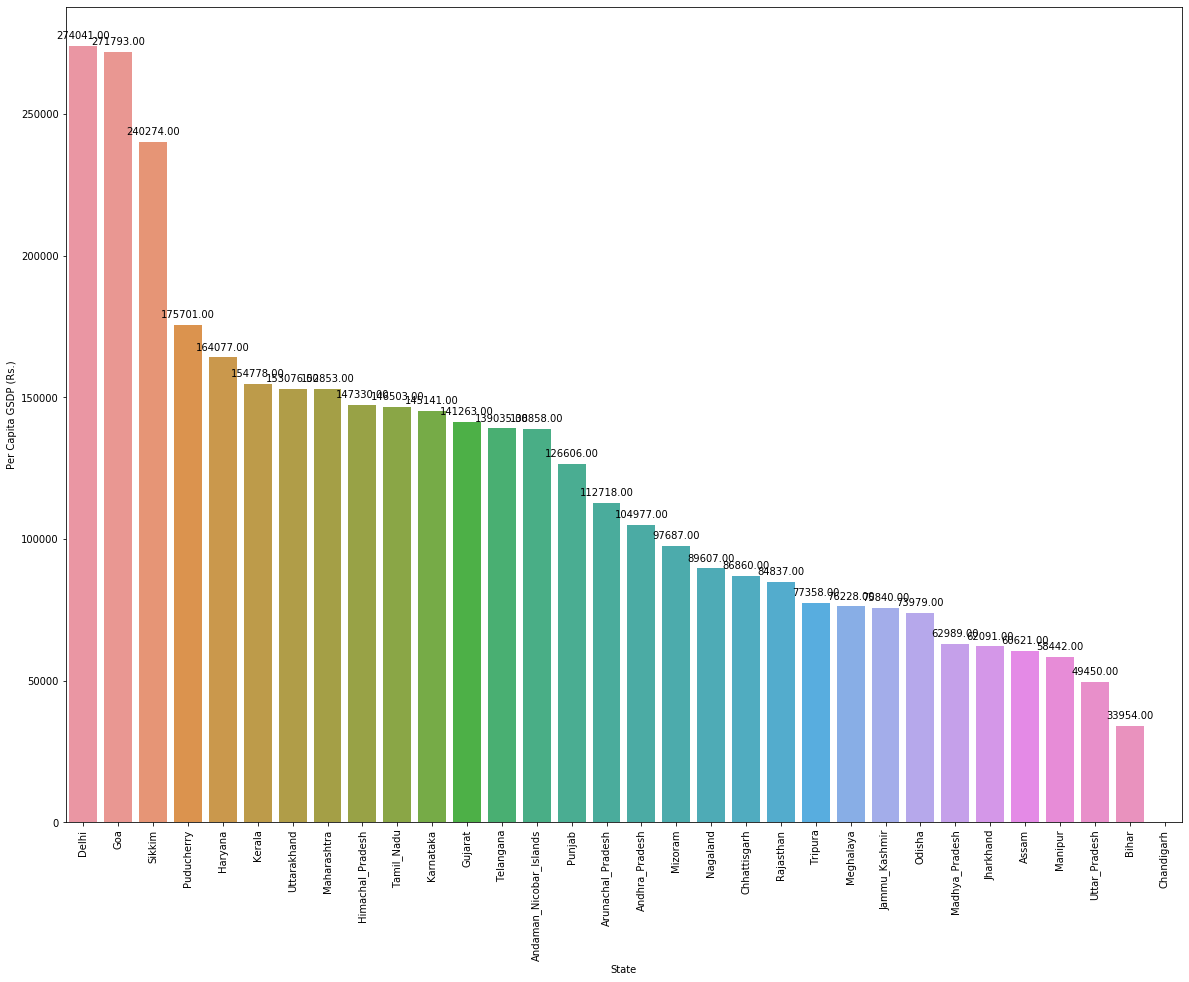

In [984]:
plt.figure(figsize=(20,15))
graph=sns.barplot(x='State',y='Per Capita GSDP (Rs.)',data=percapita)
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.xticks(rotation = 90)
plt.xlabel('State')
plt.ylabel('Per Capita GSDP (Rs.)')
plt.show()

#TASK


In [985]:
print("Here is the list of bottom 5 sates by Per Capita GSDP:")
print("                       ")
print(percapita.tail())

Here is the list of bottom 5 sates by Per Capita GSDP:
                       
            State Per Capita GSDP (Rs.)
21          Assam                 60621
28        Manipur                 58442
0   Uttar_Pradesh                 49450
24          Bihar                 33954
15     Chandigarh                   NaN


In [986]:
print("Here is the list of Top 5 sates by Per Capita GSDP:")
print("                       ")
print(percapita.head(5))

Here is the list of Top 5 sates by Per Capita GSDP:
                       
         State Per Capita GSDP (Rs.)
6        Delhi                274041
13         Goa                271793
4       Sikkim                240274
7   Puducherry                175701
25     Haryana                164077


# Task:
Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [987]:
print("The ratio is 8.07, which means Delhi, which has the highest GSDP is 8 times \nhigher than Bihar which has the lowest GSDP.")
round(percapita.max(axis=0)['Per Capita GSDP (Rs.)']/percapita.min(axis=0)['Per Capita GSDP (Rs.)'],2)

The ratio is 8.07, which means Delhi, which has the highest GSDP is 8 times 
higher than Bihar which has the lowest GSDP.


8.07

In [988]:
#create a dataframe for sectors
sector=all_states.filter(['State','Primary','Secondary','Tertiary','Gross State Domestic Product','Per Capita GSDP (Rs.)'], axis=1)
sector.dropna(inplace=True)
sector.head()

,State,Primary,Secondary,Tertiary,Gross State Domestic Product,Per Capita GSDP (Rs.)
0,Uttar_Pradesh,25999255,25548724,45968959,104337115,49450
1,Meghalaya,451050,637942,1.20066e+06,2.44081e+06,76228
2,Andhra_Pradesh,16303716,10488884,22032942,52646842,104977
3,Chhattisgarh,6400817,8238886,7588778,23498180,86860
4,Sikkim,138776,845253,483103,1520933,240274


# TASK
Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage 
of the total GDP for all the states.

Which plot will you use here? Why?  
>I chose to use stacked bargraph as it will give a clear visual of the contribution by state allowing the reader to make a comparison between  states.

In [989]:
#>create a dataframe for sectors
sector['Percent_Prim_Con'] = (sector['Primary']/sector['Gross State Domestic Product'])*100
sector['Percent_sec_Con'] = (sector['Secondary']/sector['Gross State Domestic Product'])*100
sector['Percent_Ter_Con'] = (sector['Tertiary']/sector['Gross State Domestic Product'])*100
sector.sort_values(by='Gross State Domestic Product',ascending = True,inplace=True)
sector.head()

,State,Primary,Secondary,Tertiary,Gross State Domestic Product,Per Capita GSDP (Rs.),Percent_Prim_Con,Percent_sec_Con,Percent_Ter_Con
10,Andaman_Nicobar_Islands,95409,106559,372538,572094,138858,16.6772,18.6261,65.1183
23,Mizoram,225598,270072,637619,1155933,97687,19.5165,23.364,55.1605
4,Sikkim,138776,845253,483103,1520933,240274,9.1244,55.5746,31.7636
11,Arunachal_Pradesh,716959,287489,631844,1676119,112718,42.7749,17.1521,37.6968
28,Manipur,383140,220173,1.17733e+06,1.80428e+06,58442,21.2351,12.2028,65.2524


# TASK

Plot the sector wise contributions by each state

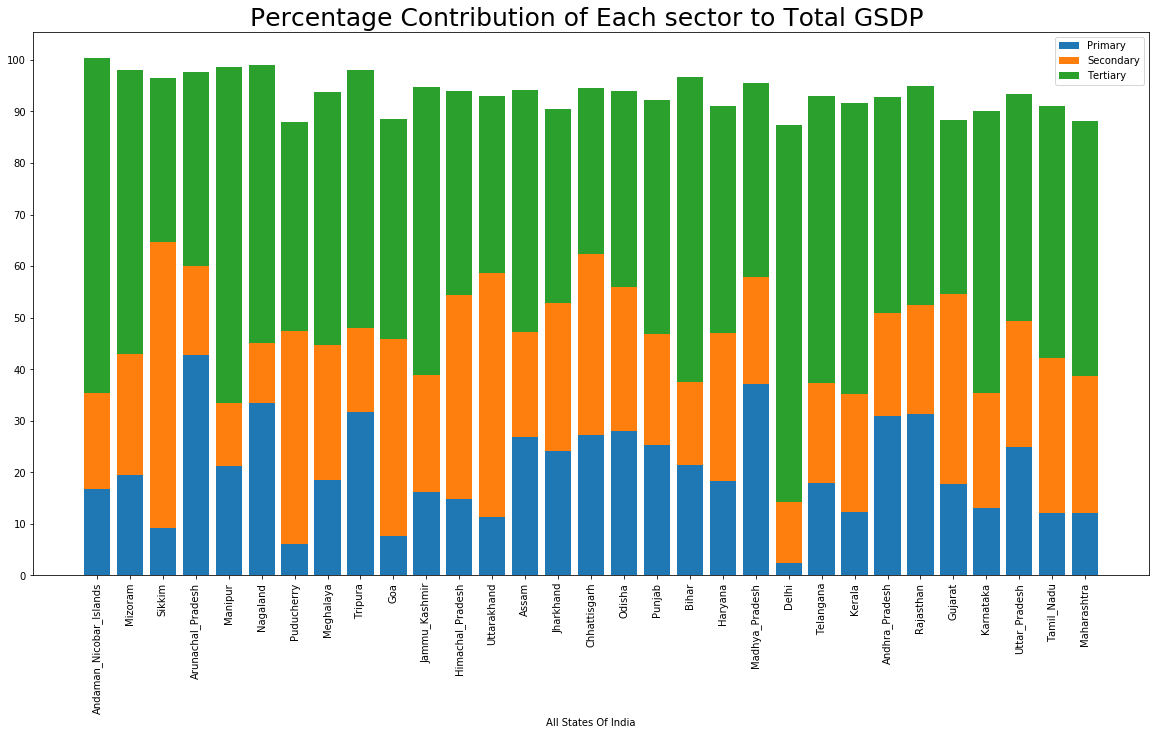

In [990]:
plt.figure(figsize=(20,10))
Primary = sector['Percent_Prim_Con']
Secondary = sector['Percent_sec_Con']
Tertiary =sector['Percent_Ter_Con']
States = sector['State']

p1 = plt.bar(States, Primary)
p2 = plt.bar(States, Secondary, bottom=Primary)
p3 = plt.bar(States, Tertiary, bottom=np.array(Primary)+np.array(Secondary))
plt.title('Percentage Contribution of Each sector to Total GSDP ',fontsize=25)
plt.xticks(States,rotation=90)
plt.yticks(np.arange(0, 110, 10)); plt.xlabel('All States Of India')
plt.legend((p1[0], p2[0], p3[0]), ('Primary', 'Secondary', 'Tertiary'))
plt.show()

Why is (Primary + Secondary + Tertiary) not equal to total GDP?
>States recive subsides from the center and have to pay taxes on the income from all the sectors.
Hence GDP != Primary + Secondary + Tertiary unless it is adjusted for the subsidies received and added paid.


Can you draw any insight from this? 
> All the states from the NE part of the conutnry are heavy on Primary sector provinding scope for Tertiery sector. There is a uniformity when it comes to secondary with the exception of Sikkim the highest and Nagaland the lowest in the sector

Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.


In [991]:
sector["Percentile_rank_Prim"]=(sector[('Percent_Prim_Con')].rank(pct = True).values)*100 #Percentile rank*100
sector.head()

,State,Primary,Secondary,Tertiary,Gross State Domestic Product,Per Capita GSDP (Rs.),Percent_Prim_Con,Percent_sec_Con,Percent_Ter_Con,Percentile_rank_Prim
10,Andaman_Nicobar_Islands,95409,106559,372538,572094,138858,16.6772,18.6261,65.1183,38.709677
23,Mizoram,225598,270072,637619,1155933,97687,19.5165,23.364,55.1605,54.838710
4,Sikkim,138776,845253,483103,1520933,240274,9.1244,55.5746,31.7636,12.903226
11,Arunachal_Pradesh,716959,287489,631844,1676119,112718,42.7749,17.1521,37.6968,100.000000
28,Manipur,383140,220173,1.17733e+06,1.80428e+06,58442,21.2351,12.2028,65.2524,58.064516


In [992]:
#reated data from with percentile ranking
correlation=sector.filter(['State','Percent_Prim_Con','Percentile_rank_Prim'], axis=1)
correlation.head()

,State,Percent_Prim_Con,Percentile_rank_Prim
10,Andaman_Nicobar_Islands,16.6772,38.709677
23,Mizoram,19.5165,54.838710
4,Sikkim,9.1244,12.903226
11,Arunachal_Pradesh,42.7749,100.000000
28,Manipur,21.2351,58.064516


Interpret the percentile ranking 
>Percentile rank of Delhi = 3.225806
>means that there are about 3% of states have a percapita lower than Delhi

In [993]:
correlation['Percentile_rank_Prim']=np.float64(correlation['Percentile_rank_Prim'])# convert the values to float
correlation['Percent_Prim_Con']=np.float64(correlation['Percent_Prim_Con'])# convert the values to float

In [994]:
#Find the correlation
print("The correaltion between percentile ranking of the primary contribution to\n% primary contribution to GDP(rounded to the hundredth's) is : ")
round(correlation['Percent_Prim_Con'].corr(correlation['Percentile_rank_Prim']),2)


The correaltion between percentile ranking of the primary contribution to
% primary contribution to GDP(rounded to the hundredth's) is : 


0.98

# Task

Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the 
highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 
85th percentiles are in C2, and so on.

In [995]:
# Creating the quartiles
q1 = round(31*0.20) 

q2 = round(31*0.5)

q3 = round(31*0.85)

q4 = round(31*1)

C4 = percapita.iloc[:q1,:]

C3 = percapita.iloc[q1:q2,:]

C2 = percapita.iloc[q2:q3,:]

C1 = percapita.iloc[q3:q4,:]

In [996]:
print("states in 20th percentile:")
C4.rename(columns = {'State':'Category'}, inplace = True)
C4

states in 20th percentile:


,Category,Per Capita GSDP (Rs.)
6,Delhi,274041
13,Goa,271793
4,Sikkim,240274
7,Puducherry,175701
25,Haryana,164077
30,Kerala,154778


In [997]:
print("States in the 50th percentile Per Capita GDP:" )
C3.rename(columns = {'State':'Category'}, inplace = True)
C3

States in the 50th percentile Per Capita GDP:


,Category,Per Capita GSDP (Rs.)
29,Uttarakhand,153076
16,Maharashtra,152853
12,Himachal_Pradesh,147330
14,Tamil_Nadu,146503
27,Karnataka,145141
5,Gujarat,141263
8,Telangana,139035
10,Andaman_Nicobar_Islands,138858
20,Punjab,126606
11,Arunachal_Pradesh,112718


In [998]:
print("States in the 85th percentile Per Capita GDP:" )
C2.rename(columns = {'State':'Category'}, inplace = True)
C2

States in the 85th percentile Per Capita GDP:


,Category,Per Capita GSDP (Rs.)
2,Andhra_Pradesh,104977
23,Mizoram,97687
17,Nagaland,89607
3,Chhattisgarh,86860
9,Rajasthan,84837
31,Tripura,77358
1,Meghalaya,76228
22,Jammu_Kashmir,75840
19,Odisha,73979
26,Madhya_Pradesh,62989


In [999]:
print("States in top 15 percentile Per Capita GDP:" )
C1.rename(columns = {'State':'Category'}, inplace = True)
C1

States in top 15 percentile Per Capita GDP:


,Category,Per Capita GSDP (Rs.)
18,Jharkhand,62091
21,Assam,60621
28,Manipur,58442
0,Uttar_Pradesh,49450
24,Bihar,33954


o	Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., 
not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

In [1000]:
all_states_prim=all_states[['State','Agriculture, forestry and fishing','Mining and quarrying', 'Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services','Gross State Domestic Product',]]
all_states_prim.columns
all_states_prim.shape

(32, 13)

Merge data from the categories c1,c2,c3,c4 with the data from the  sub-sectors

In [1001]:
c4_subsec= C4.set_index('Category').join(all_states_prim.set_index('State'))
c4_subsec=c4_subsec.drop("Per Capita GSDP (Rs.)",axis=1)
c4_subsec.loc['C4',:]= c4_subsec.sum(axis=0)
#c4_subsec=c4_subsec.drop(["Delhi","Goa","Sikkim","Puducherry","Haryana","Kerala"])
c4_subsec=c4_subsec.filter(["C4"],axis=0)
c4_subsec=c4_subsec.T
c4_subsec.head()

Category,C4
"Agriculture, forestry and fishing",1.47555e+07
Mining and quarrying,1.58601e+06
Manufacturing,1.71264e+07
"Electricity, gas, water supply & other utility services",3.03288e+06
Construction,1.36294e+07


In [1002]:
c3_subsec= C3.set_index('Category').join(all_states_prim.set_index('State'))
c3_subsec=c3_subsec.drop("Per Capita GSDP (Rs.)",axis=1)
c3_subsec.loc['C3',:]= c3_subsec.sum(axis=0)
#c2_subsec=c2_subsec.drop(["Andhra_Pradesh","Mizoram","Nagaland","Chhattisgarh","Rajasthan","Tripura","Meghalaya","Jammu_Kashmir","Odisha","Madhya_Pradesh"])
c3_subsec=c3_subsec.filter(["C3"],axis=0)
c3_subsec=c3_subsec.T
c3_subsec.head()


Category,C3
"Agriculture, forestry and fishing",7.52857e+07
Mining and quarrying,1.03921e+07
Manufacturing,1.09203e+08
"Electricity, gas, water supply & other utility services",1.3854e+07
Construction,4.07229e+07


In [1003]:
c2_subsec= C2.set_index('Category').join(all_states_prim.set_index('State'))
c2_subsec=c2_subsec.drop("Per Capita GSDP (Rs.)",axis=1)
c2_subsec.loc['C2',:]= c2_subsec.sum(axis=0)
c2_subsec=c2_subsec.filter(["C2"],axis=0)
c2_subsec=c2_subsec.T
#c3_subsec=c3_subsec.drop(["Arunachal_Pradesh","Uttarakhand","Maharashtra","Himachal_Pradesh","Tamil_Nadu","Karnataka","Gujarat","Telangana","Andaman_Nicobar_Islands","Punjab"],axis=1)

c2_subsec.head()

Category,C2
"Agriculture, forestry and fishing",6.00492e+07
Mining and quarrying,1.24878e+07
Manufacturing,2.73004e+07
"Electricity, gas, water supply & other utility services",6.4751e+06
Construction,2.08966e+07


In [1004]:
c1_subsec= C1.set_index('Category').join(all_states_prim.set_index('State'))
c1_subsec=c_subsec.drop("Per Capita GSDP (Rs.)",axis=1)
c1_subsec.loc['C1',:]= c1_subsec.sum(axis=0)
c1_subsec=c1_subsec.filter(["C1"],axis=0)
c1_subsec=c1_subsec.T
c1_subsec.head()


Category,C1
"Agriculture, forestry and fishing",4.04994e+07
Mining and quarrying,4.47805e+06
Manufacturing,2.06182e+07
"Electricity, gas, water supply & other utility services",3.03736e+06
Construction,1.83728e+07


In [1005]:
Categories_Final=pd.concat([c1_subsec,c2_subsec,c3_subsec,c4_subsec],axis=1,sort=False)
Categories_Final.iloc[:,0:]

Category,C1,C2,C3,C4
"Agriculture, forestry and fishing",4.04994e+07,6.00492e+07,7.52857e+07,1.47555e+07
Mining and quarrying,4.47805e+06,1.24878e+07,1.03921e+07,1.58601e+06
Manufacturing,2.06182e+07,2.73004e+07,1.09203e+08,1.71264e+07
"Electricity, gas, water supply & other utility services",3.03736e+06,6.4751e+06,1.3854e+07,3.03288e+06
Construction,1.83728e+07,2.08966e+07,4.07229e+07,1.36294e+07
"Trade, repair, hotels and restaurants",2.21271e+07,2.34928e+07,6.12951e+07,2.00921e+07
"Transport, storage, communication & services related to broadcasting",1.3326e+07,1.58098e+07,3.38195e+07,1.25039e+07
Financial services,5.6957e+06,8.12903e+06,3.63101e+07,1.09836e+07
"Real estate, ownership of dwelling & professional services",2.15174e+07,2.02243e+07,9.21669e+07,2.67247e+07
Public administration,1.09893e+07,1.17744e+07,1.86652e+07,5.6621e+06


In [1006]:
Categories_Final['C1']=(Categories_Final['C1']/(Categories_Final.loc['Gross State Domestic Product']['C1']))*100
Categories_Final['C2']=(Categories_Final['C2']/(Categories_Final.loc['Gross State Domestic Product']['C2']))*100
Categories_Final['C3']=(Categories_Final['C3']/(Categories_Final.loc['Gross State Domestic Product']['C3']))*100
Categories_Final['C4']=(Categories_Final['C4']/(Categories_Final.loc['Gross State Domestic Product']['C4']))*100


In [1007]:
Categories_Final=Categories_Final.reset_index()
Categories_Final.replace(["Category","index"],["index","Category"],inplace=True)


In [1008]:
Cat_index=Categories_Final.set_index("index")
Cat_index

Category,C1,C2,C3,C4
index,,,,
"Agriculture, forestry and fishing",21.8852,25.4225,12.8265,9.6076
Mining and quarrying,2.41986,5.28683,1.77052,1.03268
Manufacturing,11.1417,11.5579,18.6051,11.1513
"Electricity, gas, water supply & other utility services",1.64134,2.74131,2.36032,1.97476
Construction,9.92835,8.8468,6.93802,8.87438
"Trade, repair, hotels and restaurants",11.9571,9.94592,10.4429,13.0823
"Transport, storage, communication & services related to broadcasting",7.20114,6.69327,5.76187,8.14151
Financial services,3.07786,3.44152,6.18621,7.15163
"Real estate, ownership of dwelling & professional services",11.6276,8.56219,15.7026,17.4009


<Figure size 2160x720 with 0 Axes>

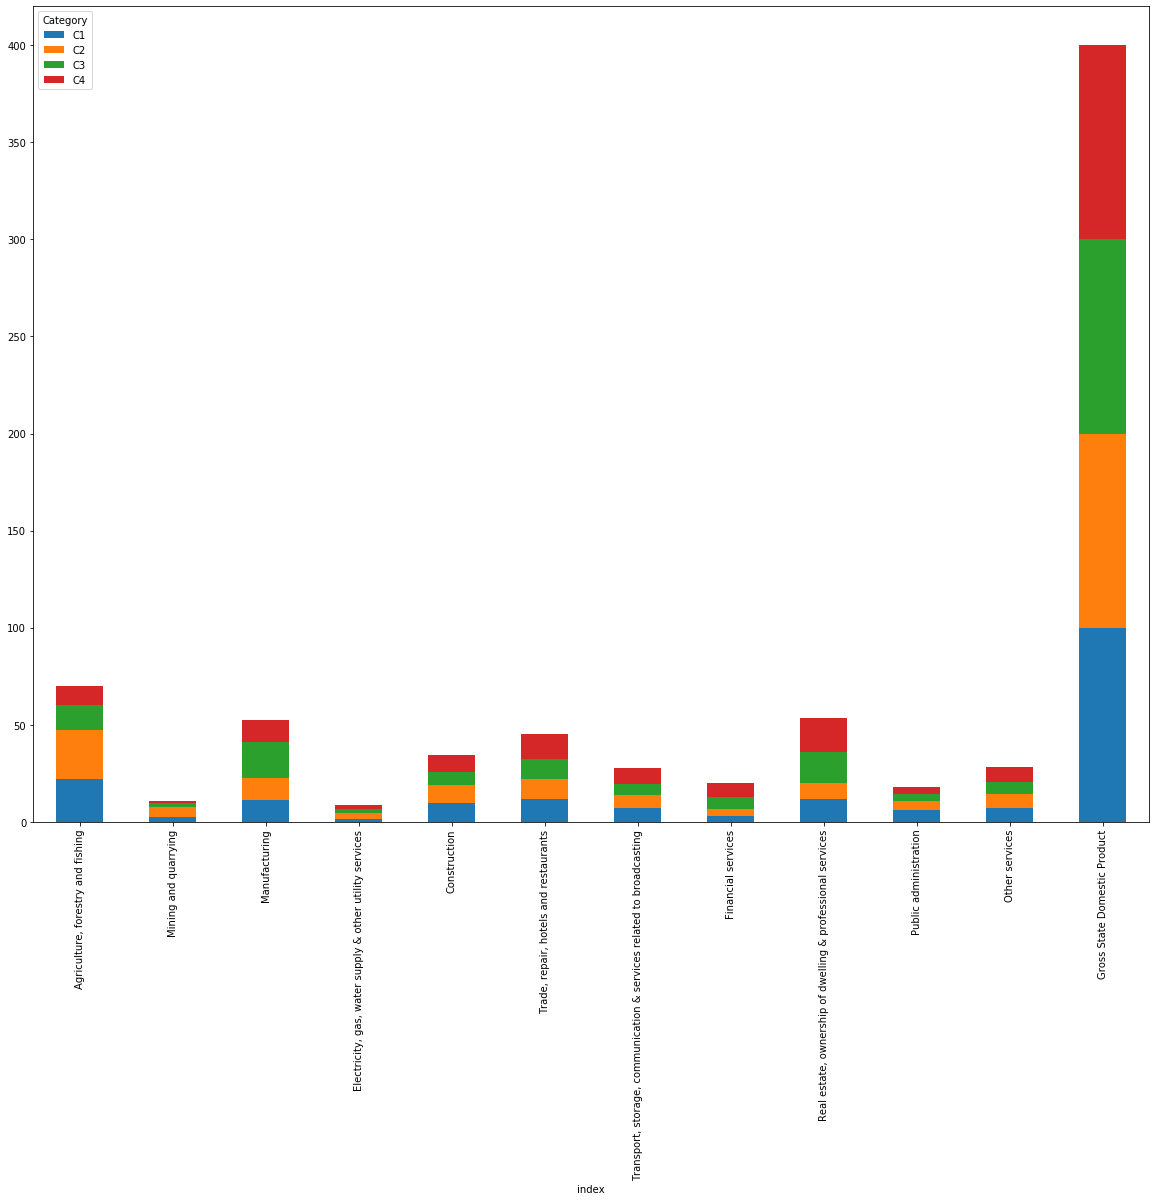

In [1009]:
plt.figure(figsize=(30,10))
Cat_index.plot(kind='bar', stacked=True, width=.5,figsize=(20,15))


In [1010]:
Categories_Final

Category,index,C1,C2,C3,C4
0,"Agriculture, forestry and fishing",21.8852,25.4225,12.8265,9.6076
1,Mining and quarrying,2.41986,5.28683,1.77052,1.03268
2,Manufacturing,11.1417,11.5579,18.6051,11.1513
3,"Electricity, gas, water supply & other utility...",1.64134,2.74131,2.36032,1.97476
4,Construction,9.92835,8.8468,6.93802,8.87438
5,"Trade, repair, hotels and restaurants",11.9571,9.94592,10.4429,13.0823
6,"Transport, storage, communication & services r...",7.20114,6.69327,5.76187,8.14151
7,Financial services,3.07786,3.44152,6.18621,7.15163
8,"Real estate, ownership of dwelling & professio...",11.6276,8.56219,15.7026,17.4009
9,Public administration,5.93844,4.98481,3.18001,3.68669


categories_final_Cum=Categories_Final.cumsum(axis =0) 
cat=categories_final_Cum.iloc[0:9,0:8]
cat


# Categories contributing to about 80% of GSDP
cat.tail(1)


Now that you have summarised the data in the form of plots, tables, etc., try to draw non-obvious insights from it. Think about questions such as:
>PRIMARY: Agriculture,  forestry and fishing Mining and quarrying,
>SECONDARY: Manufacturing, Electricity, gas, water supply & other utility services, Construction,
>TERTIARY: Trade, repair, hotels and restaurants Transport, storage, communication & services related to broadcasting Financial services Real estate, ownership of dwelling & professional services

How does the GDP distribution of the top states (C1) differ from the others?
>The states in C1 get theit GDP from the Tertiary sector while the rest are heavily form Seconday.

Which sub-sectors seem to be correlated with high GDP?
>Agriculture, forestry and fishing and manufacturing

Which sub-sectors do the various categories need to focus on? 
>Financial services provides scope for growth, establishing banks and providning opportunities for saving and investment.

Ask other such relevant questions, which you think are important, and note your insights for category separately. More insights are welcome and will be awarded accordingly.
>Low percapita generated from Finance by Category 1 and 2 states is surprising as the states in these categories are heavy Manufacturing and real estate.
> public administration is quite low across all the categories, is this beacause of large private sector and under reporting of data?
>I am plesantly surprised that the states in C4 have their highest contribution coming from real estate

 

Finally, provide at least two recommendations for each category to improve the per capita GDP.
 
 >Improve opportunities for establishing sub sectors from tertiary sectors in the North Easter regions .
(4/5 states posting positive growth are in the NE but have a lower GDP

>Incentives to encourage small family size: dropout rate is seen mostly in states that have lower per –capita GSDP even with states with high GDP and posting positive growth rates


In [1011]:
['Agriculture, forestry and fishingMining and quarryingManufacturingElectricity, gas, water supply & other utility servicesConstructionTrade, repair, hotels and restaurantsTransport, storage, communication & services related to broadcastingFinancial servicesReal estate, ownership of dwelling & professional services',
       80.88021567035683, 82.49825209036005, 80.59415590302252,
       78.4171110569786]

['Agriculture, forestry and fishingMining and quarryingManufacturingElectricity, gas, water supply & other utility servicesConstructionTrade, repair, hotels and restaurantsTransport, storage, communication & services related to broadcastingFinancial servicesReal estate, ownership of dwelling & professional services',
 80.88021567035683,
 82.49825209036005,
 80.59415590302252,
 78.4171110569786]

# Part2

In [1012]:
dropout=pd.read_csv("dropoutrate.csv",index_col=0) #downloading the file for dropout
dropout.head()

,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
Sl. No.,,,,,,,,,,,,,
1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [1013]:
# creating the dataframe for dropout 
dropout=dropout[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']]
dropout.rename(columns = {'Level of Education - State':'State','Primary - 2014-2015.1':'Primary drop rate','Upper Primary - 2014-2015':'Upper Primary drop rate','Secondary - 2014-2015':'Secondary drop rate','Senior Secondary - 2014-2015':'Senior Secondary drop rate'}, inplace = True) 
dropout.replace(['Chhatisgarh','Uttrakhand'],['Chhattisgarh','Uttarakhand'],inplace=True)
dropout=dropout[(dropout['State']!='A & N Islands')&(dropout['State']!='Dadra & Nagar Haveli')&(dropout['State']!='Daman & Diu')&(dropout['State']!='Delhi')&(dropout['State']!='Chandigarh')&(dropout['State']!='Jammu and Kashmir')&(dropout['State']!='Puducherry')&(dropout['State']!='Lakshadweep')&(dropout['State']!='West Bengal')&(dropout['State']!='All India')]
dropout=dropout.dropna(how="any")
dropout.set_index('State') #making the stte to be the index
dropout

,State,Primary drop rate,Upper Primary drop rate,Secondary drop rate
Sl. No.,,,,
2,Andhra Pradesh,6.72,5.20,15.71
3,Arunachal Pradesh,10.82,6.71,17.11
4,Assam,15.36,10.51,27.06
7,Chhattisgarh,2.91,5.85,21.26
11,Goa,0.73,0.07,11.15
12,Gujarat,0.89,6.41,25.04
13,Haryana,5.61,5.81,15.89
14,Himachal Pradesh,0.64,0.87,6.07
16,Jharkhand,5.48,8.99,24.00


In [1014]:
dropout.shape

(24, 4)

In [1015]:
percapita.set_index('State')
percapita.dropna()

,State,Per Capita GSDP (Rs.)
6,Delhi,274041
13,Goa,271793
4,Sikkim,240274
7,Puducherry,175701
25,Haryana,164077
30,Kerala,154778
29,Uttarakhand,153076
16,Maharashtra,152853
12,Himachal_Pradesh,147330
14,Tamil_Nadu,146503


# correlation between dropout rate and percapita GSDP

In [1016]:
for i in list(dropout_per.columns):
    dropout_per[i]  = pd.to_numeric(dropout_per[i])
    dropout_per[i] = dropout_per[i].astype(float)

In [1017]:
dropout_per.shape

(19, 4)

,Primary drop rate,Upper Primary drop rate,Secondary drop rate,Per Capita GSDP (Rs.)
Primary drop rate,100.000000,64.314448,17.051997,-54.064288
Upper Primary drop rate,64.314448,100.000000,50.791671,-61.531368
Secondary drop rate,17.051997,50.791671,100.000000,-48.789654
Per Capita GSDP (Rs.),-54.064288,-61.531368,-48.789654,100.000000


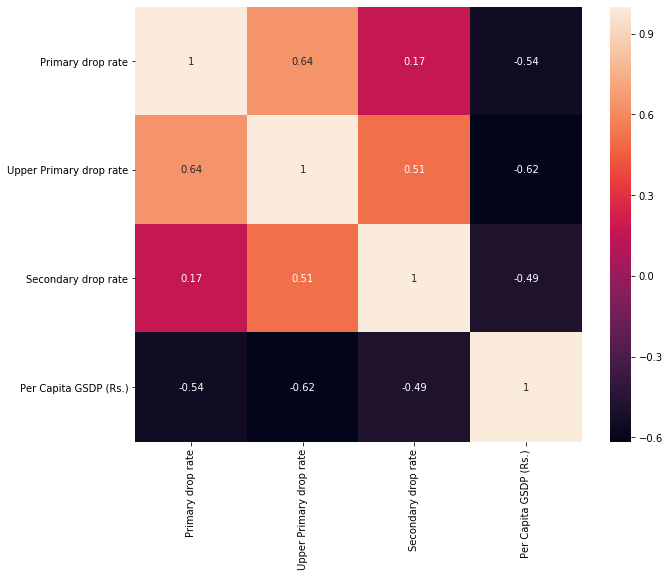

In [1018]:
dropout_per_corr=dropout_per.corr()#correlation between dropout rate and per capita
plt.figure(figsize=(10,8))
sns.heatmap(dropout_per_corr,annot=True)
dropout_per_corr*100

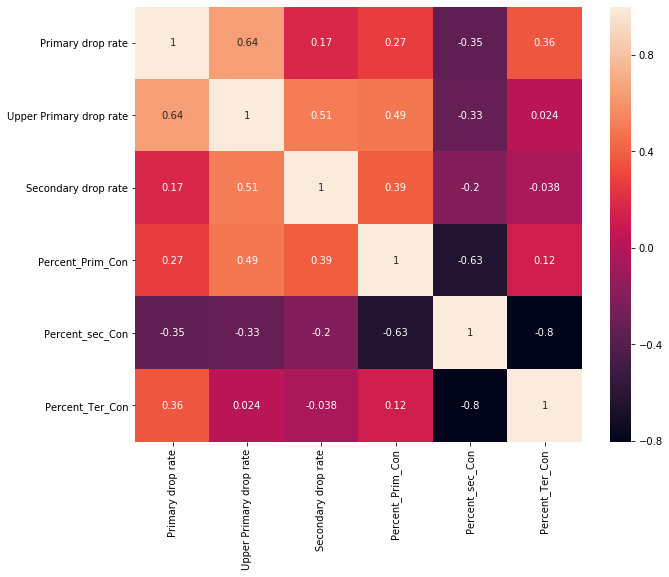

In [1019]:
dropout_sector= dropout.set_index('State').join(sector_drop.set_index('State'), how = 'inner')
dropout_sector_corr= dropout_sector.corr()#correlation between dropout rate and percapita GSDP
plt.figure(figsize=(10,8))
sns.heatmap(dropout_sector_corr,annot=True)

# correlation between dropout rate and Sectors

In [1020]:
sector_drop=sector[["State","Percent_Prim_Con","Percent_sec_Con","Percent_Ter_Con"]]
sector_drop.head()# dataframe for Sectors 


,State,Percent_Prim_Con,Percent_sec_Con,Percent_Ter_Con
10,Andaman_Nicobar_Islands,16.6772,18.6261,65.1183
23,Mizoram,19.5165,23.364,55.1605
4,Sikkim,9.1244,55.5746,31.7636
11,Arunachal_Pradesh,42.7749,17.1521,37.6968
28,Manipur,21.2351,12.2028,65.2524


In [1021]:
for i in list(sector_drop.columns)[1:]:
    sector_drop[i]  = pd.to_numeric(sector_drop[i])
    sector_drop[i] = sector_drop[i].astype(float)

,Primary drop rate,Upper Primary drop rate,Secondary drop rate,Percent_Prim_Con,Percent_sec_Con,Percent_Ter_Con
Primary drop rate,100.000000,64.314448,17.051997,27.290863,-35.429216,35.918291
Upper Primary drop rate,64.314448,100.000000,50.791671,49.099641,-32.993726,2.366268
Secondary drop rate,17.051997,50.791671,100.000000,38.765290,-19.871867,-3.800570
Percent_Prim_Con,27.290863,49.099641,38.765290,100.000000,-63.428368,12.107003
Percent_sec_Con,-35.429216,-32.993726,-19.871867,-63.428368,100.000000,-80.301409
Percent_Ter_Con,35.918291,2.366268,-3.800570,12.107003,-80.301409,100.000000


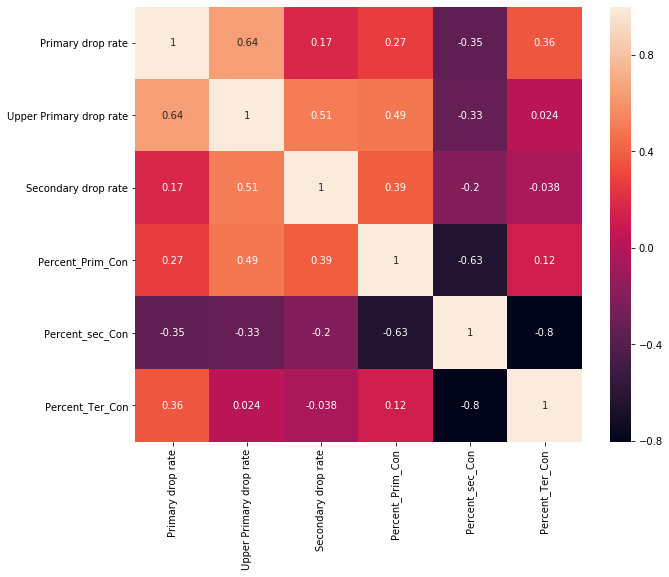

In [1022]:
dropout_sector= dropout.set_index('State').join(sector_drop.set_index('State'), how = 'inner')
dropout_sector_corr= dropout_sector.corr()#correlation between dropout rate and percapita GSDP
plt.figure(figsize=(10,8))
sns.heatmap(dropout_sector_corr,annot=True)
dropout_sector_corr*100

# correlation between dropout rate and population

In [1023]:
pop_all_states.shape

(32, 2)

In [1024]:
pop_all_states=all_states[["State","Population ('00)"]]
dropout_pop= dropout.set_index('State').join(pop_all_states.set_index('State'), how = 'inner')
dropout_pop.shape

(19, 4)

In [1025]:
for i in list(dropout_pop.columns):
    dropout_pop[i]  = pd.to_numeric(dropout_pop[i])
    dropout_pop[i] = dropout_pop[i].astype(float) 

,Primary drop rate,Upper Primary drop rate,Secondary drop rate,Population ('00)
Primary drop rate,100.000000,64.314448,17.051997,-30.106945
Upper Primary drop rate,64.314448,100.000000,50.791671,-3.471508
Secondary drop rate,17.051997,50.791671,100.000000,3.046649
Population ('00),-30.106945,-3.471508,3.046649,100.000000


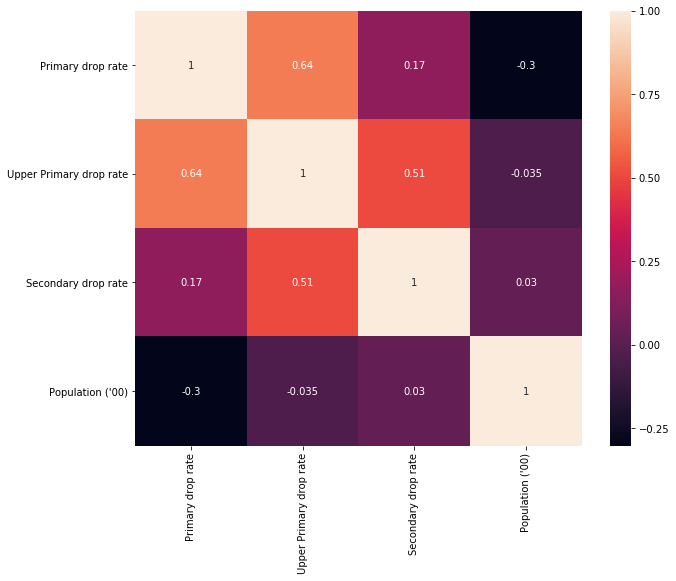

In [1026]:
dropout_pop_corr=dropout_pop.corr()
plt.figure(figsize=(10,8))
sns.heatmap(dropout_pop_corr,annot=True) 
dropout_pop.corr()*100